In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

sns.set(style="whitegrid")

# Load cleaned dataset
df = pd.read_csv("../data/processed/contracts_clean.csv")
df.head()


,As of Date,Fiscal Year,Region,Borrower Country / Economy,Borrower Country / Economy Code,Project ID,Project Name,Project Global Practice,Procurement Category,Procurement Method,...,Contract Description,Borrower Contract Reference Number,Supplier ID,Supplier,Supplier Country / Economy,Supplier Country / Economy Code,Supplier Contract Amount (USD),Review type,Signing Year,Signing Month
0,12/04/2025,2022,Europe and Central Asia,Kyrgyz Republic,KG,P151416,Urban Development Project,Public Admin;Energy & Extractives;Transportati...,Consultant Services,Quality And Cost-Based Selection,...,Technical Supervision of construction in pilot...,UDP PPG-QCBS-2016-4-12,316882.0,M/S. AIRES INGEGNERIA,Italy,IT,161538.89,Prior,2022,5
1,12/04/2025,2022,Europe and Central Asia,Kyrgyz Republic,KG,P151416,Urban Development Project,Public Admin;Energy & Extractives;Transportati...,Consultant Services,Quality And Cost-Based Selection,...,Technical Supervision of construction in pilot...,UDP PPG-QCBS-2016-4-12,325453.0,ALL INGEGNERIA,Italy,IT,161538.89,Prior,2022,5
2,12/04/2025,2021,"Middle East, North Africa, Afghanistan, and Pa...",Pakistan,PK,P154036,Disaster and Climate Resilience Improvement Pr...,Public Admin;Transportation;Water/Sanit/Waste,Goods,Request for Quotations,...,Fixtures and Furnishers for establishment of P...,PK-PDMA PUNJAB-2495-GO-RFQ,330376.0,FREEZ POINT,Pakistan,PK,34059.20,Post,2020,12
3,12/04/2025,2020,Eastern and Southern Africa,Eastern and Southern Africa,3E,P111556,AFR RI-East Africa Public Health Laboratory Ne...,Info & Communication;Health,Goods,Request for Bids,...,"SUPPLY OF REAGENTS, SUPPLIES CONSUMABLES AND C...",TZ-MOH-13063-GO-RFB,341173.0,YUKOS ENTERPRISES (E.A),Tanzania,TZ,59575.27,Post,2020,6
4,12/04/2025,2021,South Asia,Bangladesh,BD,P149553,Bangladesh NATP-2: National Agricultural Techn...,Agriculture,Consultant Services,Individual Consultant Selection,...,"ICT Specialist of PMU, NATP-2",SD/PMU/IC-07A,646978.0,INDIVIDUAL CONSULTANT,Unknown,Unknown,238123.91,Post,2020,11


In [2]:
#Load Saved Model and Encoder

model = joblib.load("../models/best_model.pkl")
encoder = joblib.load("../models/label_encoder.pkl")

In [3]:
#Prepare X and y

target = "Supplier Contract Amount (USD)"
X = df.drop(columns=[target])
y = df[target]


In [4]:
#Encode Categorical Columns Using Saved Encoder

for col in X.select_dtypes(include=['object']).columns:
    X[col] = encoder.fit_transform(X[col])


In [5]:
#Predict Using Saved Model

y_pred = model.predict(X)


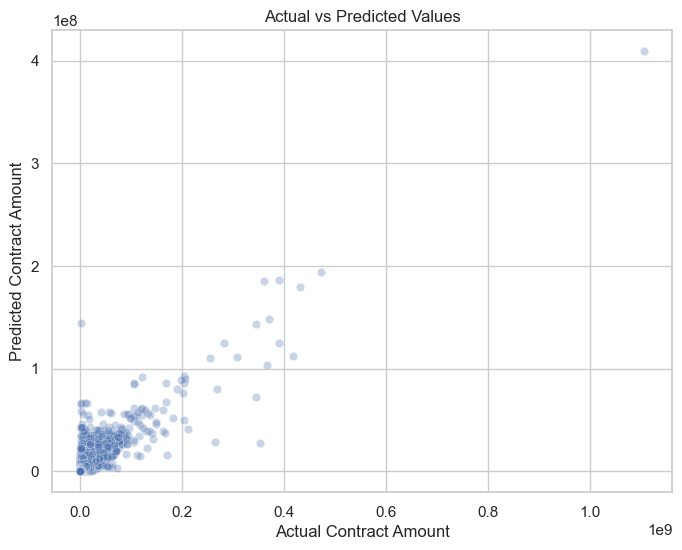

In [6]:
# Actual vs Predicted Scatter Plot

plt.figure(figsize=(8,6))
sns.scatterplot(x=y, y=y_pred, alpha=0.3)
plt.xlabel("Actual Contract Amount")
plt.ylabel("Predicted Contract Amount")
plt.title("Actual vs Predicted Values")
plt.show()


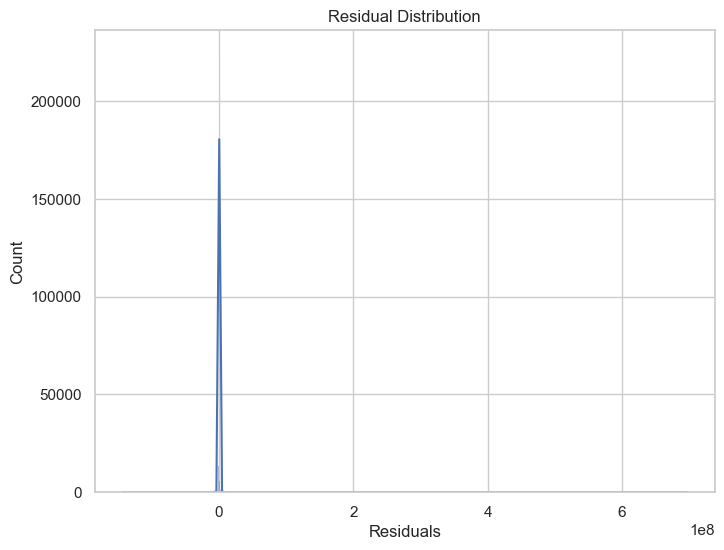

In [7]:
#Residual Distribution

residuals = y - y_pred

plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.show()


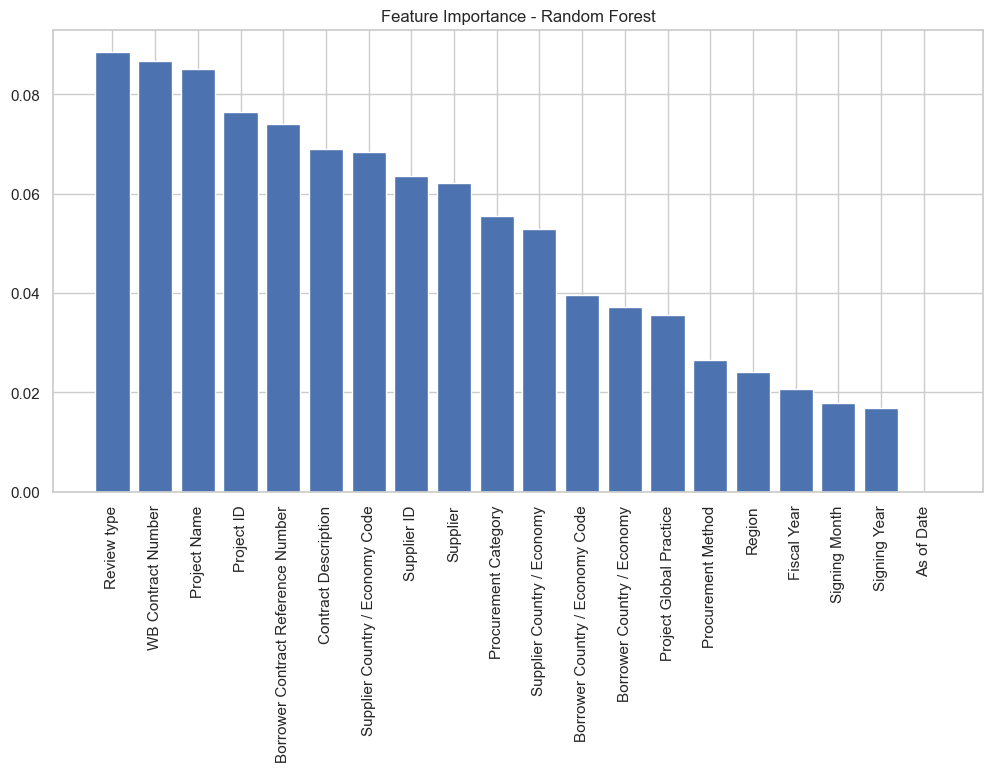

In [8]:
#Feature Importance (Random Forest)

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(12, 6))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), features[indices], rotation=90)
plt.title("Feature Importance - Random Forest")
plt.show()


In [9]:
# Evaluation Metrics Again (Summary)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse = np.sqrt(mean_squared_error(y, y_pred))
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

rmse, mae, r2


(np.float64(3065745.0614561834), 338252.05569434457, 0.57526844108774)